# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset

The dataset to import has NaN values and it is missing to apply the one hot encoding to the feature called VisitorType

In [2]:
df = pd.read_csv('data/df_nan.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.20,0.20,0.0,0.0,2,1.0,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.00,0.10,0.0,0.0,2,2.0,2,1,2,Returning_Visitor,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.20,0.20,0.0,0.0,2,4.0,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,NaN,0.05,0.14,0.0,0.0,2,3.0,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.02,0.05,0.0,0.0,2,3.0,3,1,4,Returning_Visitor,1,0


In [4]:
df.isnull().sum()

Administrative                0
Administrative_Duration    1448
Informational                 0
Informational_Duration      231
ProductRelated                0
ProductRelated_Duration    6148
BounceRates                   0
ExitRates                     0
PageValues                 2473
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Weekend                       0
Revenue                       0
dtype: int64

# One hot encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
one_hot = OneHotEncoder()
X_oh = one_hot.fit_transform(df[['VisitorType']])

In [7]:
one_hot.categories_

[array(['New_Visitor', 'Other', 'Returning_Visitor'], dtype=object)]

In [8]:
df.drop('VisitorType', axis=1, inplace=True)

In [9]:
df = pd.concat([df,pd.DataFrame(data=X_oh.todense(), columns=['New_Visitor', 'Other', 'Returning_Visitor'])], axis=1)

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.0,0.20,0.20,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.00,0.10,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.20,0.20,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,NaN,0.05,0.14,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.02,0.05,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0


# Fill with mean the duration columns

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
X = df.drop('PageValues', axis=1) #trying to fill everything except pages values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imputer.fit_transform(X)

In [13]:
X_imp

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [24.        , 59.26984617,  6.        , ...,  0.        ,
         0.        ,  1.        ],
       [26.        , 59.26984617,  9.        , ...,  0.        ,
         0.        ,  1.        ],
       [27.        , 59.26984617,  2.        , ...,  0.        ,
         0.        ,  1.        ]])

In [14]:
df_mean = pd.DataFrame(X_imp, columns = X.columns)

In [15]:
df_mean['PageValues'] = df['PageValues']

In [16]:
df_mean.isnull().sum()

Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                     0
SpecialDay                    0
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
Weekend                       0
Revenue                       0
New_Visitor                   0
Other                         0
Returning_Visitor             0
PageValues                 2473
dtype: int64

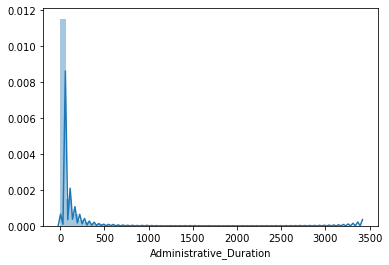

In [17]:
sns.distplot(df_mean['Administrative_Duration'])

/Users/lola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


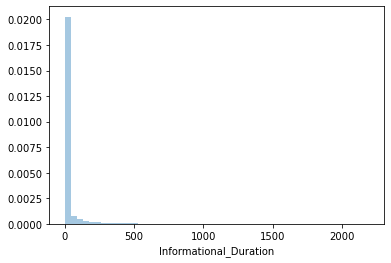

In [18]:
sns.distplot(df_mean['Informational_Duration'])

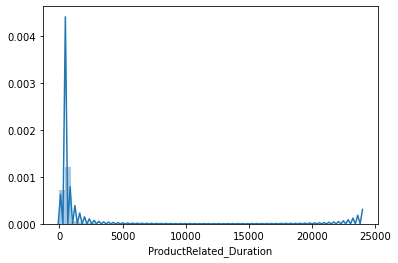

In [19]:
sns.distplot(df_mean['ProductRelated_Duration'])

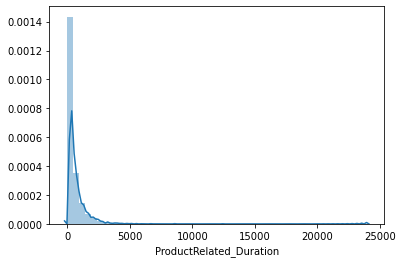

In [20]:
sns.distplot(df['ProductRelated_Duration'])

# Fill NaN in page values with KNN

In [21]:
from sklearn.impute import KNNImputer

In [22]:
X = df_mean

In [23]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor,PageValues
0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.200000,0.200000,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
1,0.0,0.000000,0.0,0.000000,2.0,64.000000,0.000000,0.100000,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.000000
2,0.0,-1.000000,0.0,-1.000000,1.0,-1.000000,0.200000,0.200000,0.0,2.0,4.0,1.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.000000
3,0.0,0.000000,0.0,0.000000,2.0,479.647091,0.050000,0.140000,0.0,2.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.000000
4,0.0,0.000000,0.0,0.000000,10.0,627.500000,0.020000,0.050000,0.0,2.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12299,24.0,59.269846,1.0,28.000000,113.0,479.647091,0.019308,0.047477,0.0,5.0,2.0,2.0,6.0,11.0,1.0,0.0,0.0,0.0,1.0,NaN
12300,24.0,59.269846,6.0,529.700000,178.0,479.647091,0.003939,0.015263,0.4,5.0,2.0,2.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,NaN
12301,24.0,59.269846,6.0,28.597826,189.0,479.647091,0.018642,0.043831,0.0,6.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.870148
12302,26.0,59.269846,9.0,28.597826,183.0,479.647091,0.011055,0.014200,0.0,11.0,3.0,2.0,2.0,13.0,0.0,1.0,0.0,0.0,1.0,NaN


In [24]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
X_imp = imputer.fit_transform(X)

In [25]:
X_imp

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [24.        , 59.26984617,  6.        , ...,  0.        ,
         1.        ,  0.87014848],
       [26.        , 59.26984617,  9.        , ...,  0.        ,
         1.        ,  0.43507424],
       [27.        , 59.26984617,  2.        , ...,  0.        ,
         1.        ,  0.07532525]])

In [26]:
df_knn = pd.DataFrame(X_imp, columns = X.columns)

In [27]:
df_knn.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor,PageValues
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,2.0,4.0,1.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,479.647091,0.05,0.14,0.0,2.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,2.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0


/Users/lola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


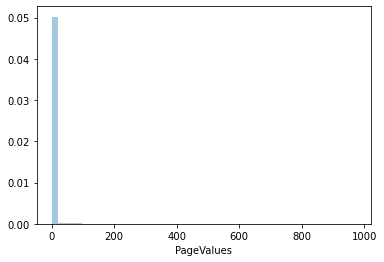

In [28]:
sns.distplot(df_knn['PageValues'])

In [29]:
df_knn['PageValues'].value_counts()

0.000000      11786
64.457500        12
0.423669          8
33.742500         7
10.452500         6
              ...  
81.816000         1
54.945000         1
854.525000        1
27.742500         1
10.659000         1
Name: PageValues, Length: 371, dtype: int64

# Export data to csv

In [30]:
df_knn.to_csv('data/df_mean_knn.csv', index=False)